<h3>Week 2: Vector/Matrix form linear regression lab</h3>


#### Aims 

* Use `scikit-learn` to implement simple linear regression
* Practice general linear regression with polynomial and RBF on the Olympic 100m data


#### Tasks 
* Replicate Lab 1 results with `scikit-learn`
* Rescale our data
* Write functions to construct the design matrix, $X$, with polynomials and RBFs
* Computing least square solutions in both 
* Solve the same problem with more sophicated gradient descent (code provided)

#### Task 1: Again, we start by loading the Olympic 100m men's data

In [1]:
import numpy as np 
%matplotlib inline
import pylab as plt

data = np.loadtxt('olympic100m.txt', delimiter=',') # make sure olympic100m.txt is in the right folder
x = data[:,0][:,None] # make x a matrix
t = data[:,1][:,None] # make t a column vector 

#### Task 2: `scikit-learn` is a widely-used library of ML algorithms. It implements linear regression as `sklearn.linear_model.LinearRegression`. Using this class, try to replicate your results from Lab Sheet 1.

*Note `scikit-learn` also includes many of the other algorithms we cover on this course and is commonly used in the real world. However these lab sheets guide you to implement the methods yourself in order to achieve a better understanding. Once you know how a method works, you can better understand how to adapt and tune existing standard implementations for your specific task.*

In [2]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x, t)
print(f'sklearn w0 = {lr.intercept_.item():.2f}, w1 = {lr.coef_.item():.4f}')
x_test = [[2012]]
pred_t_test = lr.predict(x_test)
print(f'sklearn pred for {x_test[0][0]} is {pred_t_test.item():.2f}s')

sklearn w0 = 36.42, w1 = -0.0133
sklearn pred for 2012 is 9.59s


#### Task 3: Vector/Matrix form least square solution

#### Task 3.1 Rescale $x$ 
We rescale $x$ to make it small. Doing so will stablise the computatoin, otherwise it quickly becomes unfeasible to fit polynomials over ~$2000$. Let's test the following two options:
- Option 1: `(x-1896)/40`
- Option 2: `(x-np.mean(x))/np.std(x) `

Text(0, 0.5, 'Time (seconds)')

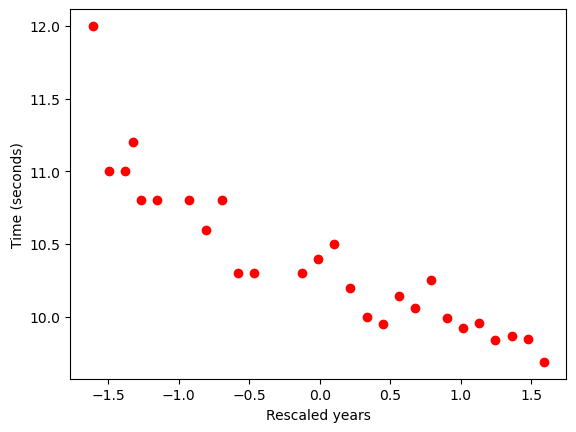

In [3]:
#x = (x-1896)/40 # Test both options
x = (x-np.mean(x))/np.std(x)
plt.plot(x, t, 'ro')
plt.xlabel('Rescaled years')
plt.ylabel('Time (seconds)')

#### Task 3.2: Check the effect of the rescaling on contour plot for simple linear model $w_0 + w_1 x$
The rescaling shows the previously diffcult to see elliptical contours. For both rescaling options, you can use $5$ to $15$ for $w_0$, and $-2$ to $1$ for $w_1$

Text(0, 0.5, '$w_1$')

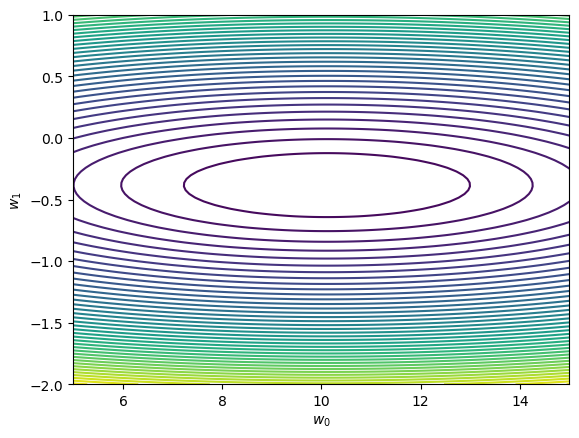

In [4]:
num_candidates = 100 # number of candidates
w0_candidates = np.linspace(start= 5 ,stop=15,num=num_candidates) # generate a numpy array of possible w0 values e.g. 5 to 15
w1_candidates = np.linspace(start=-2,stop=1,num=num_candidates) # generate a numpy array of possible w1 values e.g. -2 to 1

L = np.zeros( shape = (num_candidates,num_candidates) ) # Prelocate the loss. We are going to have num_candidates times num_candidates of them 

# Two nested for loops
for i in range(num_candidates): 
    for j in range(num_candidates):
        L[i,j] = np.mean( (t-w0_candidates[i]-w1_candidates[j]*x)**2 )

plt.contour(w0_candidates, w1_candidates, L, 50) # A different way to plot contour without using meshgrid
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

#### Task 4.1 Write your own function to construct the design matrix with polynomials

$$\mathbf{X} = \begin{bmatrix}
    1       & x_{1} & x_{1}^2 & \dots & x_{1}^K \\
    1       & x_{2} & x_{2}^2 & \dots & x_{2}^K \\
    \vdots & \vdots &\vdots &\ddots &\vdots\\
    1       & x_{N} & x_{N}^2 & \dots & x_{N}^K
\end{bmatrix} $$

In [5]:
def polynomial (x, maxorder): # The np.hstack function can be very helpful
    X = np.ones_like(x) 
    for i in range(1,maxorder+1):
        X = np.hstack((X,x**i))
    return X

#### Task 4.2 Construct the design matrix with a predefined maximum polynomial order 

In [6]:
maxorder = 9
X_poly = polynomial (x, maxorder)
X_poly.shape

(27, 10)

#### Task 4.3: Compute the least square solution

$$ \hat{w} = (\mathbf{X}^{T}\mathbf{X})^{-1} \mathbf{X}^T \mathbf{t} $$

*You can use either your own implementation or `scikit-learn.linear_model.LinearRegression`*

In [8]:
def least_square(X, t):
    return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
 
def least_square_sklearn(X, t):
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression(fit_intercept=False)  # fit_intercept=False because we already include a constant term (column of ones) in X
    lr.fit(X, t)
    return lr.coef_.T

w_poly = least_square(X_poly, t)
w_poly

array([[10.32029534],
       [-0.48242543],
       [-0.48892435],
       [ 0.95286323],
       [ 1.29813127],
       [-1.76256576],
       [-0.91299359],
       [ 1.09389556],
       [ 0.19796999],
       [-0.21974409]])

#### Task 4.4: Plot the fitted line

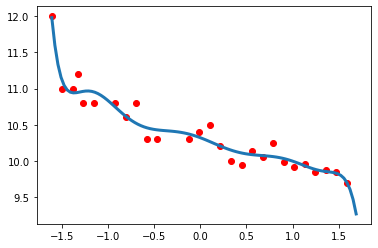

In [36]:
plt.plot(x, t, "ro")
x_test = np.linspace(min(x), max(x)+1e-1, 100)
f_test = np.dot( polynomial(x_test, maxorder), w_poly)
plt.plot(x_test, f_test, linewidth=3)

#### Task 4.5: Linear regression with RBF

Use `sklearn.kernel_ridge.KernelRidge` to perform an RBF regression, and plot the results. Set `kernel='rbf'` when creating the object to force use of an RBF kernel.  `KernelRidge.fit` takes the original data as input, and constructs the design matrix $\mathbf{X}$ internally. Note that the `alpha` parameter must be set to zero (or very small) to match what we saw in lectures; it adds an extra term to the loss, which is sometimes useful to avoid overfitting.

In [ ]:
from sklearn.kernel_ridge import KernelRidge

# Use sklearn's KernelRidge with RBF kernel
# gamma parameter controls the width (gamma = 1/(2*width))
width = 0.2
gamma = 1.0 / (2.0 * width)
kr = KernelRidge(alpha=1e-10, kernel='rbf', gamma=gamma)
kr.fit(x, t)

# Plot sklearn KernelRidge implementation
plt.plot(x, t, "ro")
x_test = np.linspace(min(x), max(x) + 1e-1, 100)
f_test_sklearn = kr.predict(x_test)
plt.plot(x_test, f_test_sklearn, linewidth=3)

**The remainder of Task 4 is trickier; it walks you through re-implementing the above RBF regression by hand.** It will help you to understand the mechanics of the algorithm better, but is not important for everyday use.

#### Task 4.6 Write you own function to construct the design matrix with RBF

$$ h_k(x) = \exp \left( -\frac{ (x-\mbox{center}[k]) ^2}{2\mbox{width}}  \right)$$


In [ ]:
def rbf (x, center, width):
    X = np.exp( -0.5*(x-center[0])**2/width)
    for i in range (len(center))[1:]:
        X = np.hstack( (X,np.exp( -0.5*(x-center[i])**2/width)) )
    return X

#### Task 4.7 Construct  the design matrix with $x$ itself as the center parameter
Start with `width = 10` and test different values

In [ ]:
center = x
width = 0.2
X_rbf = rbf(x, center, width)
X_rbf.shape

#### Task 4.8 Compute the least square solution with the previouly defined function

In [ ]:
w_rbf = least_square(X_rbf,t)
w_rbf

#### Task 4.9 Plot the fitted line

In [ ]:
plt.plot(x, t, "ro")
x_test = np.linspace(min(x), max(x)+1e-1, 100)
f_test = np.dot( rbf(x_test, center, width), w_rbf)
plt.plot(x_test, f_test, linewidth=3)

#### Task 4.10 (advanced)

Change your (custom, not `sklearn`) implementation of `least_square` to use `np.linalg.inv` instead of `np.linalg.solve`. Does this still work? If so, which solution would you prefer? If not, why?

_You should find this fails with numerical errors, since $\mathbf{X}^T\mathbf{X}$ is low-rank (hence non-invertible). This can be mitigated by using fewer RBFs, and/or narrower width_

#### Task 5 (advanced): Instead of using the least square solution,  we test gradient descent in general linear regression setting

- Average squared loss: $L(\mathbf{w}) = \frac{1}{N} (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w})$
- Gradient: $ \frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} = -\frac{2}{N} \left(\mathbf{X}^T\mathbf{t} - \mathbf{X}^T \mathbf{X} \mathbf{w}\right) $

#### Task 5.1 Define your own functions for the average squared loss and its gradient

Note the extra code to change the shape of `w` and `g`. These are made to fit the requirement in `scipy.optimize.minimize`. It requires the gradient (`g`) to be the shape of `(d,)`, `d` being the dimension of `w` and `g`.

In [41]:
def loss(w, X, t): # define the loss function
    w = w[:,None]
    L = np.mean( (t-np.dot(X, w))**2 ) # the average squared loss function
    return L

def gradient(w, X, t): # define the gradient function
    w = w[:,None]
    g = -2.0/len(t) * ( np.dot( np.transpose(X), t ) - np.dot(np.transpose(X), np.dot(X, w)) )
    return g[:,0]

#### Task 5.2 This cell checks if your gradient function is correct by compare it with numerical approximation

In [42]:
w0 = np.ones((X_rbf.shape[1], 1))[:,0]

eps    = 1e-4 # step size 
mygrad = gradient(w0, X_rbf, t)
fdgrad = np.zeros(w0.shape)
for d in range(len(w0)): # pertub each dimension in term
    mask = np.zeros(w0.shape) # a binary mask that only allows selected dimension to change
    mask[d]   = 1
    fdgrad[d] = (loss(w0 + eps*mask, X_rbf, t) - loss(w0 - eps*mask, X_rbf, t))/(2*eps) # definition of gradient

print("MYGRAD: ", mygrad) # my gradient output
print("FDGRAD: ", fdgrad) # numerical gradient
print("Error: ", np.linalg.norm(mygrad-fdgrad)/np.linalg.norm(mygrad+fdgrad) ) # error 

MYGRAD:  [-1.63673777 -1.82183501 -1.94213363 -1.97603648 -1.99283674 -1.9800152
 -1.82281672 -1.71200711 -1.59790498 -1.48884137 -1.38917777 -1.14936972
 -1.08273006 -1.01954075 -0.96041128 -0.9086869  -0.86998847 -0.85067594
 -0.85560771 -0.88584633 -0.9370318  -0.99902748 -1.05717139 -1.09505171
 -1.09822332 -1.05784431 -0.97306493]
FDGRAD:  [-1.63673777 -1.82183501 -1.94213363 -1.97603648 -1.99283674 -1.9800152
 -1.82281672 -1.71200711 -1.59790498 -1.48884137 -1.38917777 -1.14936972
 -1.08273006 -1.01954075 -0.96041128 -0.9086869  -0.86998847 -0.85067594
 -0.85560771 -0.88584633 -0.9370318  -0.99902748 -1.05717139 -1.09505171
 -1.09822332 -1.05784431 -0.97306493]
Error:  2.13413533859929e-12


#### Task 5.3: We run an advanced gradient descent method, BFGS, which automatically determine the learning rate. 
SciPy's `minimize` has already implemented a range of different methods 

In [43]:
import scipy.optimize as opt

res = opt.minimize(loss, w0, args=(X_rbf, t), method='BFGS', jac=gradient, 
                   options={'gtol': 1e-7, 'disp': True})
res.x # solution

Optimization terminated successfully.
         Current function value: 0.009154
         Iterations: 197
         Function evaluations: 202
         Gradient evaluations: 202


array([  643.34546266, -1301.03133434,    39.79372505,   540.21377179,
         602.50325874,  -293.88637713,  -783.03874882,   244.92280954,
         692.22989619,   128.86341296,  -684.09274262,   251.91063457,
         223.41497442,  -146.89858689,  -295.34813108,   -46.33959004,
         237.28637191,   185.67745388,  -101.3458383 ,  -222.80102455,
         -26.40818164,   193.62619296,   111.5190609 ,  -147.1769445 ,
        -138.16153676,   186.06797714,   -44.11875735])

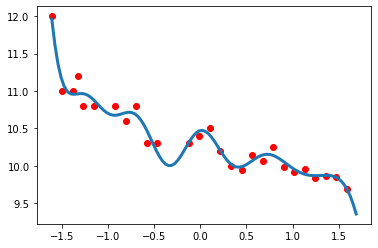

In [44]:
plt.plot(x, t, "ro")
x_test = np.linspace(min(x), max(x)+1e-1, 100)
f_test = np.dot( rbf(x_test, center, width), res.x[:,None]) 
plt.plot(x_test, f_test, linewidth=3)


The loss at the least square solution is still lower

In [45]:
loss(w_rbf[:,0], X_rbf, t) < loss(res.x, X_rbf, t)

True